In [1]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd

print("cv2:", cv2.__version__)
print("mediapipe:", mp.__version__)
print("numpy:", np.__version__)
print("pandas:", pd.__version__)

cv2: 4.12.0
mediapipe: 0.10.14
numpy: 2.2.6
pandas: 2.3.2


In [2]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, model_complexity=1)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1763148324.619301     788 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1763148324.665014     805 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Pose landmarks detected? False


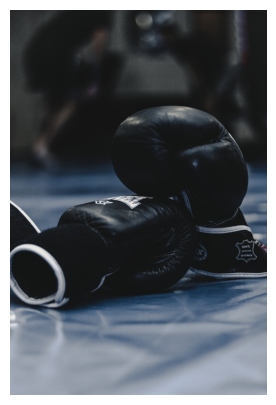

In [3]:
import requests
from PIL import Image
from io import BytesIO
import numpy as np
from matplotlib import pyplot as plt

url = "https://images.unsplash.com/photo-1549719386-74dfcbf7dbed?w=800"

resp = requests.get(url)
img = Image.open(BytesIO(resp.content))

rgb = np.array(img)
results = pose.process(rgb)

print("Pose landmarks detected?", bool(results.pose_landmarks))

plt.figure(figsize=(8,5))
plt.imshow(rgb)
plt.axis("off")
plt.show()


(np.float64(-0.5), np.float64(799.5), np.float64(1199.5), np.float64(-0.5))

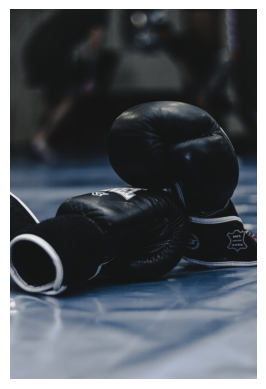

In [4]:
import requests
from PIL import Image
from io import BytesIO

url = "https://images.unsplash.com/photo-1549719386-74dfcbf7dbed?w=800"
img = Image.open(BytesIO(requests.get(url).content))
plt.imshow(img); plt.axis('off')

In [5]:
results = pose.process(np.array(img))

if results.pose_landmarks:
    print("Pose detected!")
else:
    print("No pose detected")

No pose detected


/opt/app-root/lib64/python3.12/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


POSE DETECTED — Success! 🥊🔥


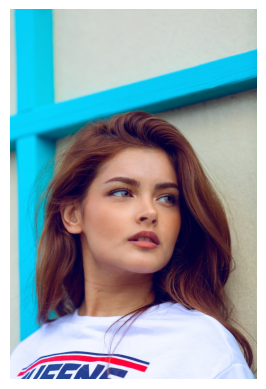

In [6]:
import requests
from PIL import Image
from io import BytesIO
import numpy as np
from matplotlib import pyplot as plt

url = "https://images.unsplash.com/photo-1529626455594-4ff0802cfb7e?w=800"
img = Image.open(BytesIO(requests.get(url).content))

plt.imshow(img); plt.axis('off')

results = pose.process(np.array(img))

if results.pose_landmarks:
    print("POSE DETECTED — Success! 🥊🔥")
else:
    print("No pose detected (unexpected)")
